<a href="https://colab.research.google.com/github/luisriverodiaz/CoderHouse_DataScienceII_PrimeraEntrega/blob/main/PreEntrega_Proyecto_DS_Luis_Rivero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primera Entrega
## Alumno Luis Rivero
## Comisión 60940
## Data Science II: Machine Learning para la Ciencia de Datos

#Resumen
El estudio inicia para una empresa en el rubro de aerolínea de bandera china, donde lo que busca es realizar una análisis para entender cómo mejorar la preferencia de sus clientes hacia su empresa. Para esto se realiza un estudio con los datos de más de 62.000 clientes frecuentes, con datos estadísticos desde que se inscribieron al programa de viajero frecuente, los datos de los viajes que hicieron, etc.

#Objetivo
En esta etapa del trabajo el objetivo es implementar un modelo LRFMC (por sus siglas en ingles Length, Recency, Frequency, Monetary y Customer Cost,en español significa Duración, Actualidad, Frecuencia, Factor Monetario y Costo para el Cliente), este modelo es muy utilizado en el mundo de la aviación y nos permite segmentar a los clientes en diferentes grupos, entender sus características y lograr sugerir una estrategia comercial para cada grupo.

#Contexto Comercial
Hace ya varios años que el sector se ha vuelto más competitivo, han surgido varios compañias "Low Cost", donde buscan cada detalle para poder reducir costos, pero hay que cuidar que esa baja de costos no redunde en una experiencia de usuario negativa. Es por esto que comprende el comportamiento del usuario es clave para poder desarrollar un producto, que cuide el costo, pero que maximice positivamente la experiencia de viajar con la compañía.

# Hipótesis
- Existe una relación importante entre la cantidad de viajes, recaudación en los últimos dos años, km recorridos, lo que sugiere una relación causal.
- Si agrupamos a los clientes por generación, encontramos que tienen comportamientos diferentes, por ejemplo, los viajeros más jóvenes vuelan con mayor frecuencia.


#1) Imports y carga de datos

##Significado de los campos del dataset original

| Campo  |   Descripción  |
|---|---|
| MEMBER_NO | ID de Miembre |
| FFP_DATE | Fecha de ingreso al programa de viajero frecuente |
| FIRST_FLIGHT_DATE | Fecha de su primer vuelo |
| GENDER | Género |
| FFP_TIER | Nivel dentro del programa de viajero Frecuente |
| WORK_CITY | Ciudad de Origen |
| WORK_PROVINCE | Provincia/Estado de Origen |
| WORK_COUNTRY | País de Origen |
| AGE | Edad |
| LOAD_TIME | Fecha de recopilación de datos |
| FLIGHT_COUNT | Cantidad de vuelos realizados |
| BP_SUM | Planes de viaje |
| SUM_YR_1 | Ingresos último año |
| SUM_YR_2 | Ingresos año anterior |
| SEG_KM_SUM | Suma de Km de los vuelos |
| LAST_FLIGHT_DATE | Fecha del último vuelo |
| LAST_TO_END | Días desde el último vuelo |
| AVG_INTERVAL | Tiempo promedio entre vuelos |
| MAX_INTERVAL | Tiempo máximo entre dos vuelos |
| EXCHANGE_COUNT | Número de canjes de puntos |
| avg_discount | Descuento promedio |
| Points_Sum | Puntos obtenidos |
| Point_NotFlight | Puntos no utilizados |

##Importación del dataset

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Cargo el dataset
df = pd.read_csv('https://github.com/luisriverodiaz/CoderHouse_DataScienceII_PrimeraEntrega/raw/main/flight.csv')
# Se debería poder acceder de cualquiera de las dos formas
#df = pd.read_csv('https://github.com/luisriverodiaz/CoderHouse_DataScienceII_PrimeraEntrega/raw/main/flight.csv')

In [5]:
# Me fijo las columnas
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [6]:
# Me fijo el tamaño del dataset
df.shape

(62988, 23)

In [7]:
# Me fijo el tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

#2) Estructurado de Datos

Revisando los tipos de datos veo que algunos tienen nulos y otros el tipo de dato no es el esperado.

Columnas que esperaría que fuesen fecha no lo son como FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE.

Varias columnas poseen nulos como GENDER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, SUM_YR_1, SUM_YR_2



##Procesamiento de datos

In [8]:
# Convierto el tipo de dato a datetime a las columnas que están mal
df['FFP_DATE'] = pd.to_datetime(df["FFP_DATE"])
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df["FIRST_FLIGHT_DATE"])
df["LOAD_TIME"] = pd.to_datetime(df["LOAD_TIME"])

El campo LAST_FLIGHT_DATE tiene valores incorrectos como 29/02/2014. Lo cambio a 28/02/2014

In [9]:
df.loc[df["LAST_FLIGHT_DATE"].str.strip()=="2014/2/29  0:00:00","LAST_FLIGHT_DATE"]="2/28/2014"

Ahora sí le puedo cambiar el tipo de dato

In [10]:
df["LAST_FLIGHT_DATE"] = pd.to_datetime(df["LAST_FLIGHT_DATE"])

In [11]:
# Reviso las fechas para ver si los valores son razonables
df_fechas = df.select_dtypes(include=['datetime64[ns]'])
df_fechas.describe()

,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62988,62988
mean,2010-03-06 23:58:48.672128,2010-09-01 17:59:44.911411968,2014-03-30 23:59:59.999999744,2013-10-07 14:41:24.130310656
min,2004-11-01 00:00:00,1905-12-31 00:00:00,2014-03-31 00:00:00,2012-04-01 00:00:00
25%,2008-04-12 00:00:00,2008-12-14 18:00:00,2014-03-31 00:00:00,2013-07-08 00:00:00
50%,2010-10-08 00:00:00,2011-04-23 00:00:00,2014-03-31 00:00:00,2013-12-15 00:00:00
75%,2012-03-29 00:00:00,2012-07-26 00:00:00,2014-03-31 00:00:00,2014-03-03 00:00:00
max,2013-03-31 00:00:00,2015-05-30 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00


##Corrijo valores absurdos

In [12]:
# No puedo tener fechas del primer vuelo anteriores a la fecha de registro en el programa de viajero frecuente. Elimino esos registros
df = df[df['FIRST_FLIGHT_DATE'] >= df['FFP_DATE']]

# Tampoco puedo tener que la fecha del primer vuelo sea posterior a la de recolección de datos
df = df[df['FIRST_FLIGHT_DATE'] <= df['LOAD_TIME']]

# Vuelvo a revisar
df_fechas = df.select_dtypes(include=['datetime64[ns]'])
df_fechas.describe()


,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE
count,62980,62980,62980,62980
mean,2010-03-07 02:28:37.116545024,2010-09-02 19:29:19.872975616,2014-03-31 00:00:00.000000256,2013-10-07 14:21:38.697999616
min,2004-11-01 00:00:00,2004-11-03 00:00:00,2014-03-31 00:00:00,2012-04-01 00:00:00
25%,2008-04-12 00:00:00,2008-12-14 18:00:00,2014-03-31 00:00:00,2013-07-08 00:00:00
50%,2010-10-08 00:00:00,2011-04-23 00:00:00,2014-03-31 00:00:00,2013-12-15 00:00:00
75%,2012-03-29 00:00:00,2012-07-26 00:00:00,2014-03-31 00:00:00,2014-03-03 00:00:00
max,2013-03-31 00:00:00,2014-03-30 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00


## Datos Faltantes

In [14]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2268
WORK_PROVINCE        3247
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [15]:
# En el caso de WORK_CITY, WORK_PROVINCE y WORK_COUNTRY, en vez de eliminarlos los completo con "Desconocido"
df[["WORK_CITY", "WORK_PROVINCE", "WORK_COUNTRY"]] = df[["WORK_CITY", "WORK_PROVINCE", "WORK_COUNTRY"]].fillna("Desconocido")

In [16]:
df.isna().sum()

MEMBER_NO              0
FFP_DATE               0
FIRST_FLIGHT_DATE      0
GENDER                 3
FFP_TIER               0
WORK_CITY              0
WORK_PROVINCE          0
WORK_COUNTRY           0
AGE                  420
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1             551
SUM_YR_2             138
SEG_KM_SUM             0
LAST_FLIGHT_DATE       0
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

In [17]:
# En el resto de los casos, los elimino ya que son menos datos y puede afectar más al resultado del análisis
df = df.dropna()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61873 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          61873 non-null  int64         
 1   FFP_DATE           61873 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  61873 non-null  datetime64[ns]
 3   GENDER             61873 non-null  object        
 4   FFP_TIER           61873 non-null  int64         
 5   WORK_CITY          61873 non-null  object        
 6   WORK_PROVINCE      61873 non-null  object        
 7   WORK_COUNTRY       61873 non-null  object        
 8   AGE                61873 non-null  float64       
 9   LOAD_TIME          61873 non-null  datetime64[ns]
 10  FLIGHT_COUNT       61873 non-null  int64         
 11  BP_SUM             61873 non-null  int64         
 12  SUM_YR_1           61873 non-null  float64       
 13  SUM_YR_2           61873 non-null  float64       
 14  SEG_KM_SUM 

Eliminamos 1115 registros, esto equivale a un 1.76% de los datos originales.

In [19]:
#Verifico si tengo registros duplicados
df.duplicated().sum()

0

El dataset no posee filas repetidas

#3) Análisis Exploratorio de Datos (EDA)

In [20]:
# Creo dos dataset separado para los datos que voy a trabajar como numéricos y categóricos. Las columnas de fechas las voy a trabajar como categóricas porque voy a agrupar por meses

df_num = df.select_dtypes(include=['float64', 'int64'])
df_cat = df.select_dtypes(include=['object','datetime64[ns]'])

In [21]:
df_num.head()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,6,31.0,210,505308,239560.0,234188.0,580717,1,3.483254,18,34,0.961639,619760,50
1,28065,6,42.0,140,362480,171483.0,167434.0,293678,7,5.194245,17,29,1.252314,415768,33
2,55106,6,40.0,135,351159,163618.0,164982.0,283712,11,5.298507,18,20,1.254676,406361,26
3,21189,5,64.0,23,337314,116350.0,125500.0,281336,97,27.863636,73,11,1.090870,372204,12
4,39546,6,48.0,152,273844,124560.0,130702.0,309928,5,4.788079,47,27,0.970658,338813,39


In [22]:
df_cat.head()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
0,2006-11-02,2008-12-24,Male,.,beijing,CN,2014-03-31,2014-03-31
1,2007-02-19,2007-08-03,Male,Desconocido,beijing,CN,2014-03-31,2014-03-25
2,2007-02-01,2007-08-30,Male,.,beijing,CN,2014-03-31,2014-03-21
3,2008-08-22,2008-08-23,Male,Los Angeles,CA,US,2014-03-31,2013-12-26
4,2009-04-10,2009-04-15,Male,guiyang,guizhou,CN,2014-03-31,2014-03-27


In [23]:
# En el caso de las numéricas elimino la fila del ID de miembro, ya que es un valor único
df_num = df_num.drop('MEMBER_NO', axis=1)

In [24]:
# Reviso los datos estadísticos de las columnas numéricas
df_num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FFP_TIER,61873.0,4.103405,0.375768,4.0,4.000000,4.000000,4.000000,6.0
AGE,61873.0,42.494351,9.888429,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,61873.0,11.962358,14.114333,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,61873.0,11039.429525,16392.913288,0.0,2589.000000,5799.000000,12974.000000,505308.0
SUM_YR_1,61873.0,5374.194645,8123.133287,0.0,1020.000000,2815.000000,6598.000000,239560.0
SUM_YR_2,61873.0,5660.706770,8701.940572,0.0,833.000000,2826.000000,6912.000000,234188.0
SEG_KM_SUM,61873.0,17300.022659,21037.527414,368.0,4865.000000,10181.000000,21494.000000,580717.0
LAST_TO_END,61873.0,172.635010,181.244362,1.0,29.000000,105.000000,260.000000,731.0
AVG_INTERVAL,61873.0,68.159709,77.686824,0.0,23.750000,45.000000,82.500000,728.0
MAX_INTERVAL,61873.0,167.466666,123.166871,0.0,81.000000,144.000000,229.000000,728.0


Filtro valores no representativos

In [25]:
# La edad mínima es de 6 años, no tiene sentido para este análisis miembros menores de edad
df = df[df['AGE'] >= 18]
df_num = df_num[df_num['AGE'] >= 18]

df_num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FFP_TIER,61822.0,4.103474,0.375894,4.0,4.000000,4.000000,4.000000,6.0
AGE,61822.0,42.516839,9.861164,18.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,61822.0,11.967811,14.117415,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,61822.0,11040.408139,16395.817174,0.0,2591.000000,5799.500000,12971.750000,505308.0
SUM_YR_1,61822.0,5375.302939,8125.515808,0.0,1020.000000,2816.000000,6598.750000,239560.0
SUM_YR_2,61822.0,5662.315891,8703.829115,0.0,833.250000,2826.000000,6912.750000,234188.0
SEG_KM_SUM,61822.0,17301.236954,21040.840234,368.0,4866.000000,10182.000000,21492.250000,580717.0
LAST_TO_END,61822.0,172.559348,181.208760,1.0,29.000000,105.000000,260.000000,731.0
AVG_INTERVAL,61822.0,68.150237,77.681189,0.0,23.750000,45.000000,82.428571,728.0
MAX_INTERVAL,61822.0,167.472761,123.132586,0.0,81.000000,144.000000,229.000000,728.0


In [26]:
# Si bien la columna FFP_TIER es numérica, el comportamiento que tiene es categórico, ya que es un entero entre 4 y 6
df_num = df_num.drop('FFP_TIER', axis=1)
df_cat = pd.concat([df_cat, df['FFP_TIER']], axis=1)
df_cat['FFP_TIER'] = df_cat['FFP_TIER'].astype('object')
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61873 entries, 0 to 62986
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           61873 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  61873 non-null  datetime64[ns]
 2   GENDER             61873 non-null  object        
 3   WORK_CITY          61873 non-null  object        
 4   WORK_PROVINCE      61873 non-null  object        
 5   WORK_COUNTRY       61873 non-null  object        
 6   LOAD_TIME          61873 non-null  datetime64[ns]
 7   LAST_FLIGHT_DATE   61873 non-null  datetime64[ns]
 8   FFP_TIER           61822 non-null  object        
dtypes: datetime64[ns](4), object(5)
memory usage: 4.7+ MB


#4) Análisis Descriptivo

##Análisis Univariado

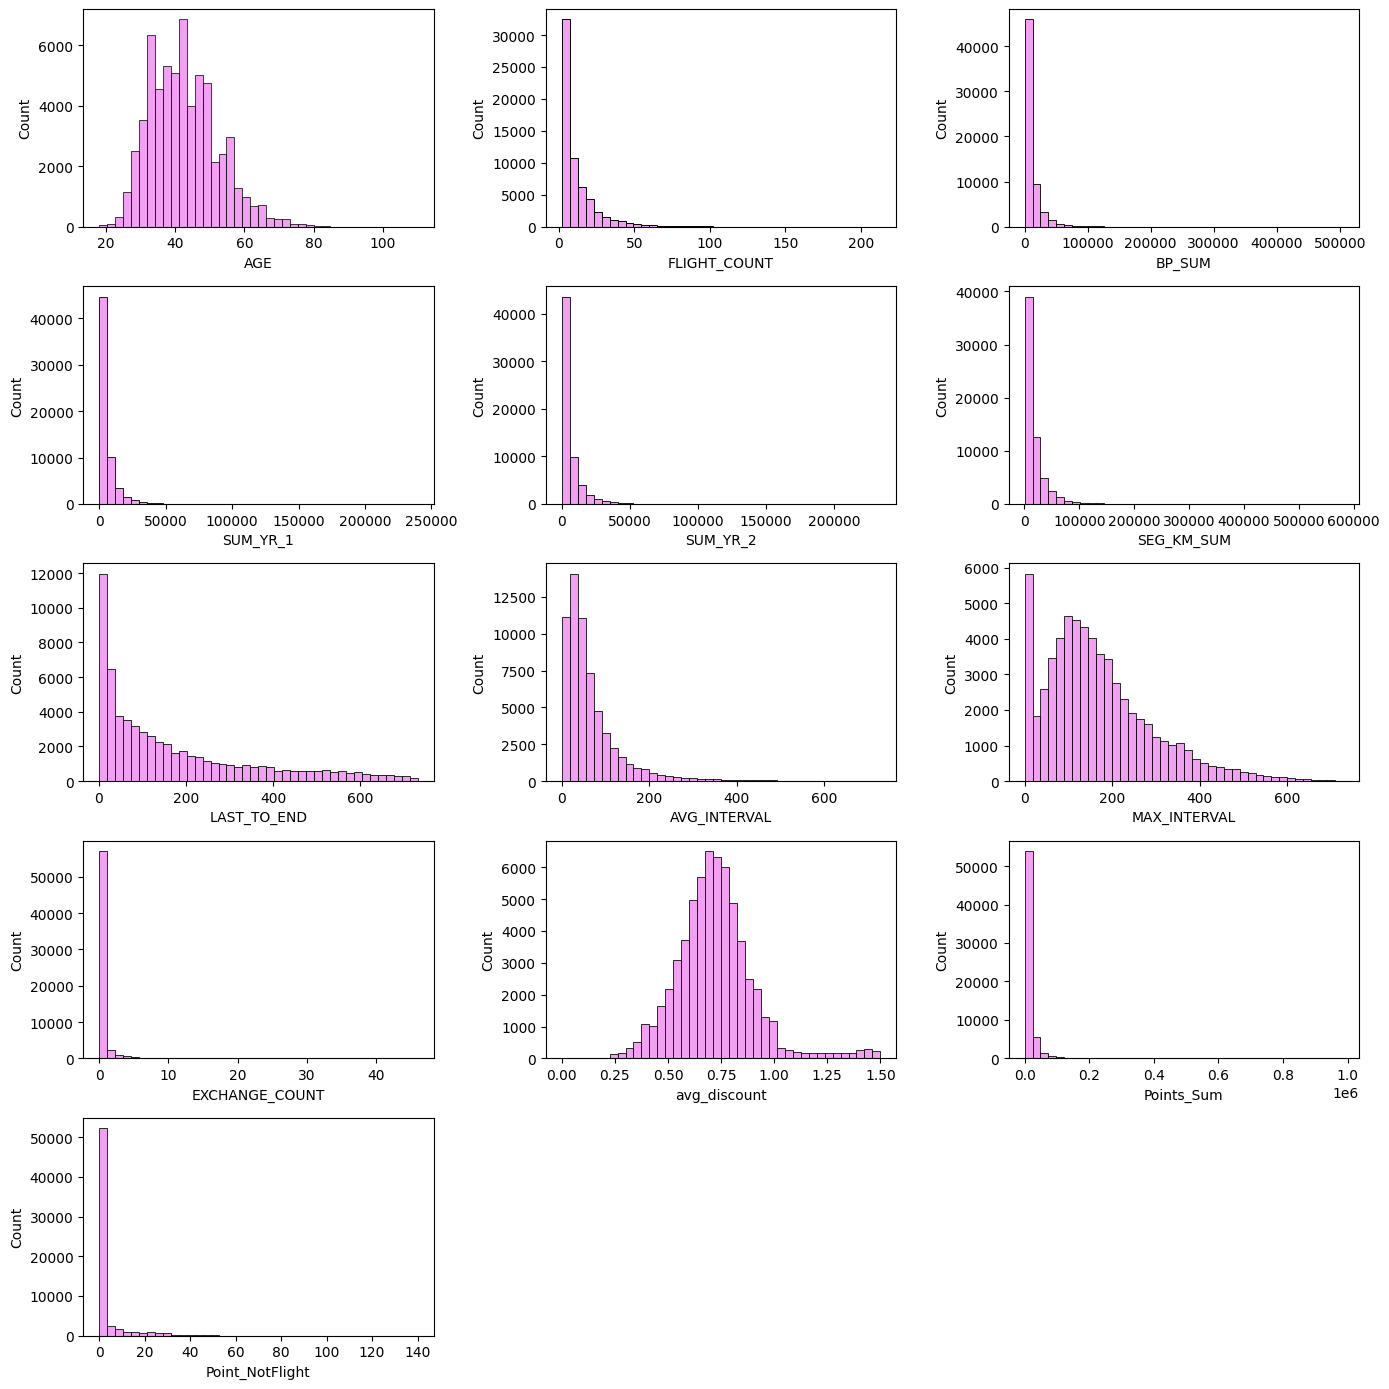

In [27]:
plt.figure(figsize = (14,14))

for i in range(len(df_num.columns)):
  plt.subplot(5,3,i+1)
  sns.histplot(data=df_num, x=df_num.columns[i], bins = 40, color = 'violet')
  plt.xlabel(df_num.columns[i])
  plt.tight_layout()

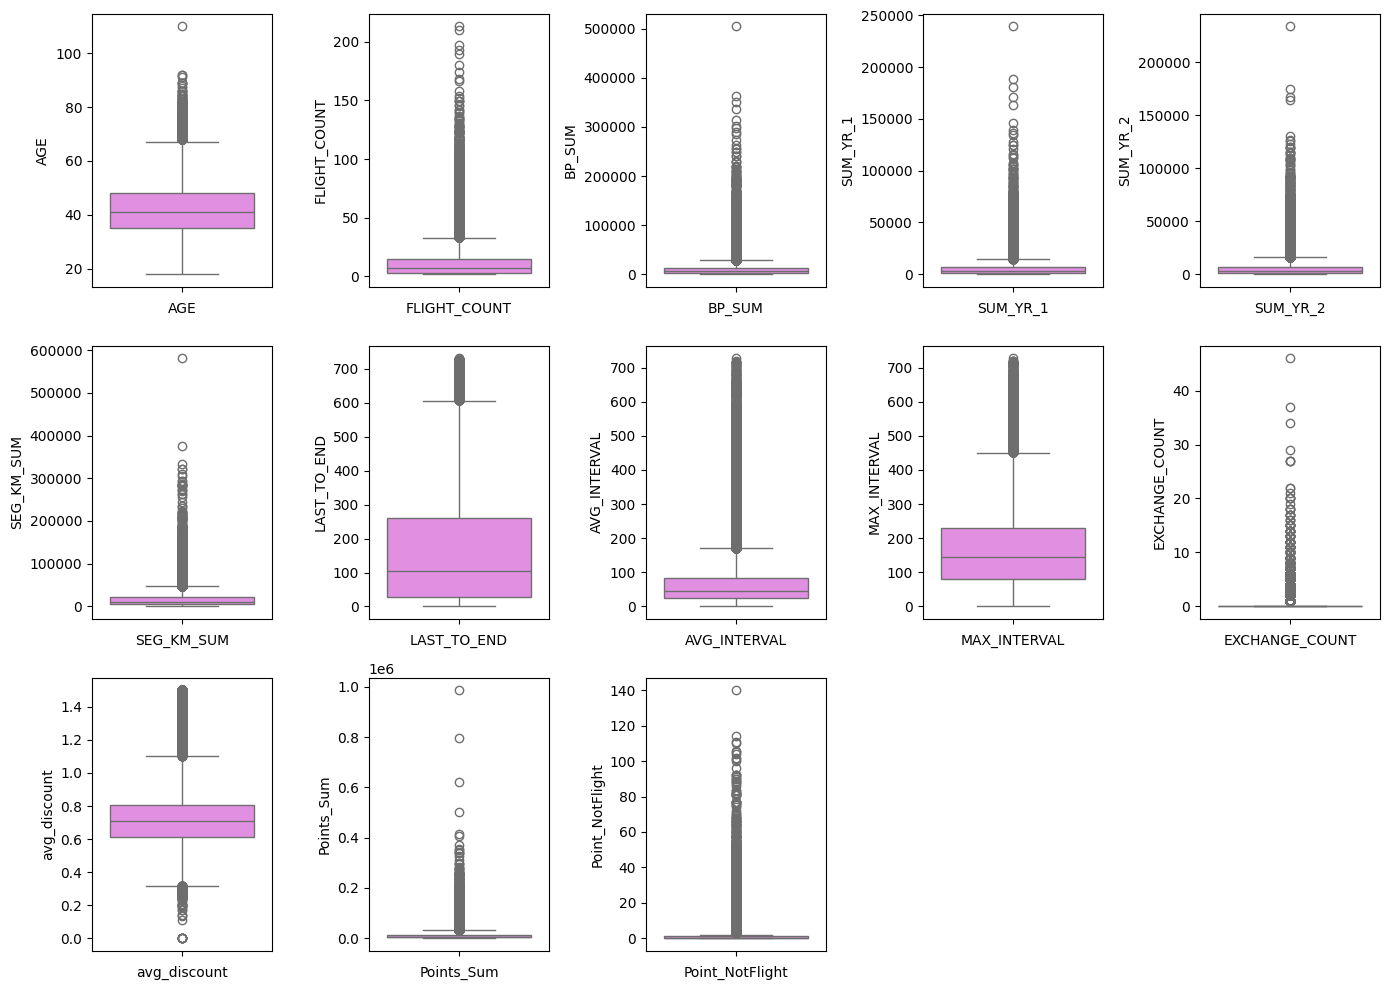

In [28]:
# Busco los outliers de manera gráfica
plt.figure(figsize = (14,10))

for i in range(len(df_num.columns)):
  plt.subplot(3,5,i+1)
  sns.boxplot(data=df_num, y=df_num.columns[i], color = 'violet')
  plt.xlabel(df_num.columns[i])
  plt.tight_layout()

Existen una gran cantidad de outliers en todas las variables numéricas

##Análisis Bivariado

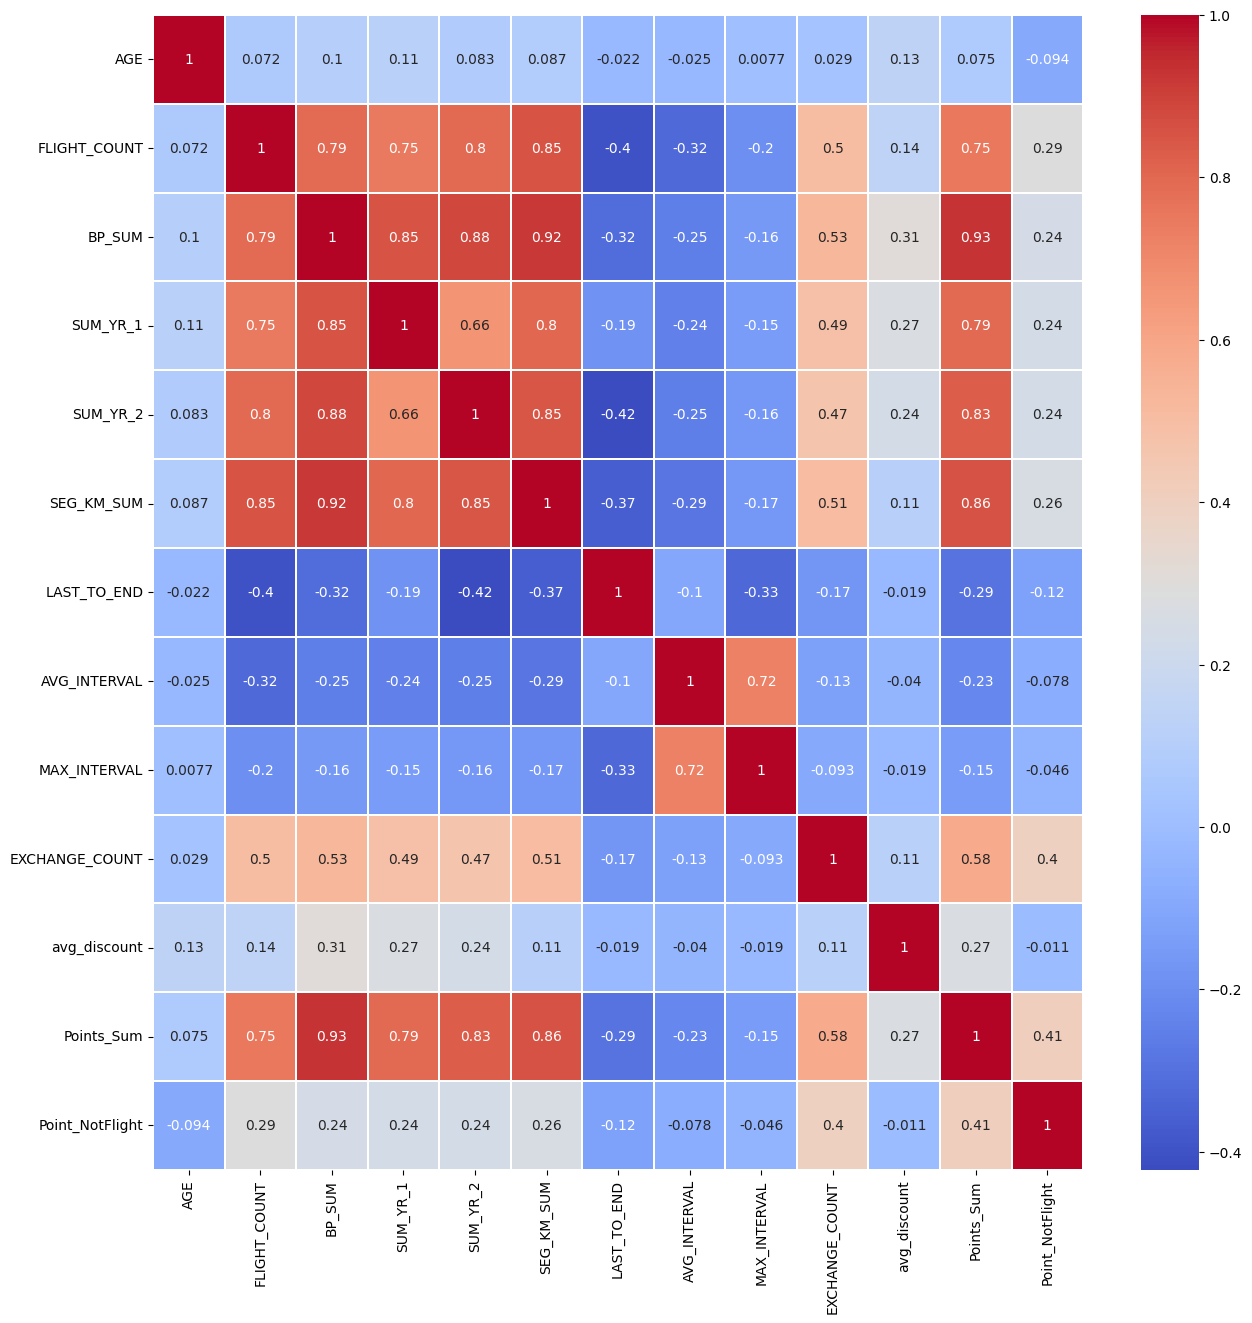

In [29]:
# Voy a analizar la correlación que existe entre las variables con un mapa de calor
corr = df_num.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap = 'coolwarm', linewidths = .2)
plt.show()

De este análisis se desprende que existe una correlación alta (>0.7) entre las columnas FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM y POINTS_SUM, todas con todas, salvo entre SUM_YR_1 y SUM_YR_2 que es un poco más baja (0,66). Esto tiene bastante sentido, porque al aumentar la cantidad de viajes que un cliente realiza, aumentan los km, puntos, planes de viaje, y el acumulado de dinero recaudado, aunque no condiciona tanto que hayan viajado un año con el siguiente.

##Análisis de origen de los clientes

Analizaremos cómo se distribuye el origen de los clientes. Como la aerolínea es de origen chino, es esperable que la mayoría de los usuarios sean de origen chino.

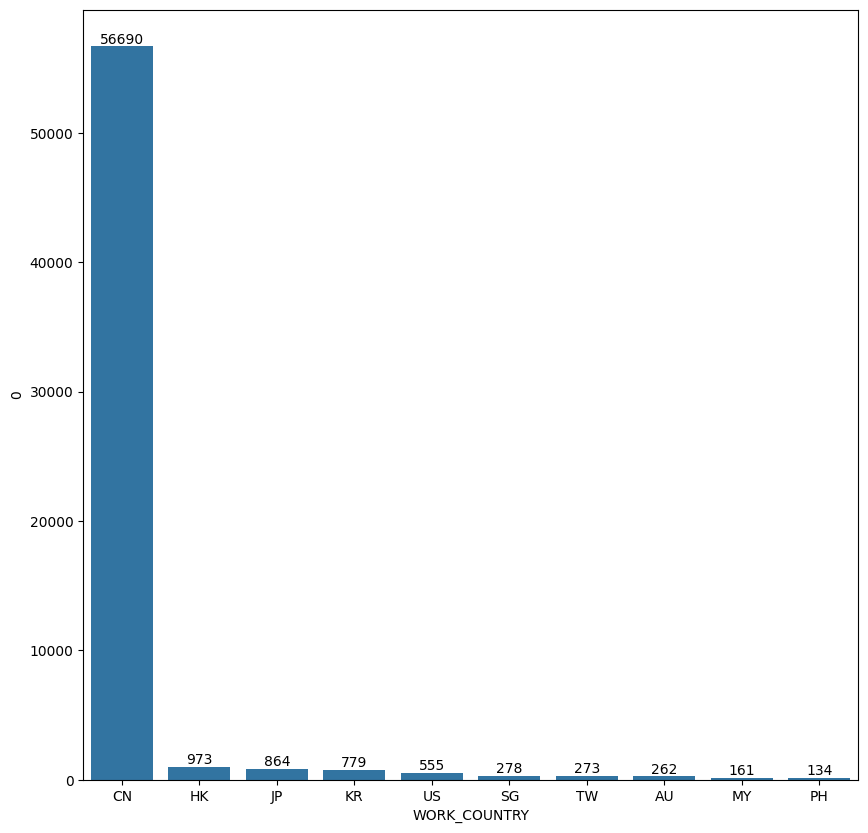

In [30]:
df_pais_origen = df.groupby('WORK_COUNTRY').size().sort_values(ascending = False).reset_index()
df_top10paises = df_pais_origen.head(10)

plt.figure(figsize=(10,10))
ax = sns.barplot(y =df_top10paises[0], x='WORK_COUNTRY', data=df_top10paises)

for bar in ax.patches:
        valor = str(int(bar.get_height()))
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{valor}', ha = 'center', va = 'bottom')

plt.show()

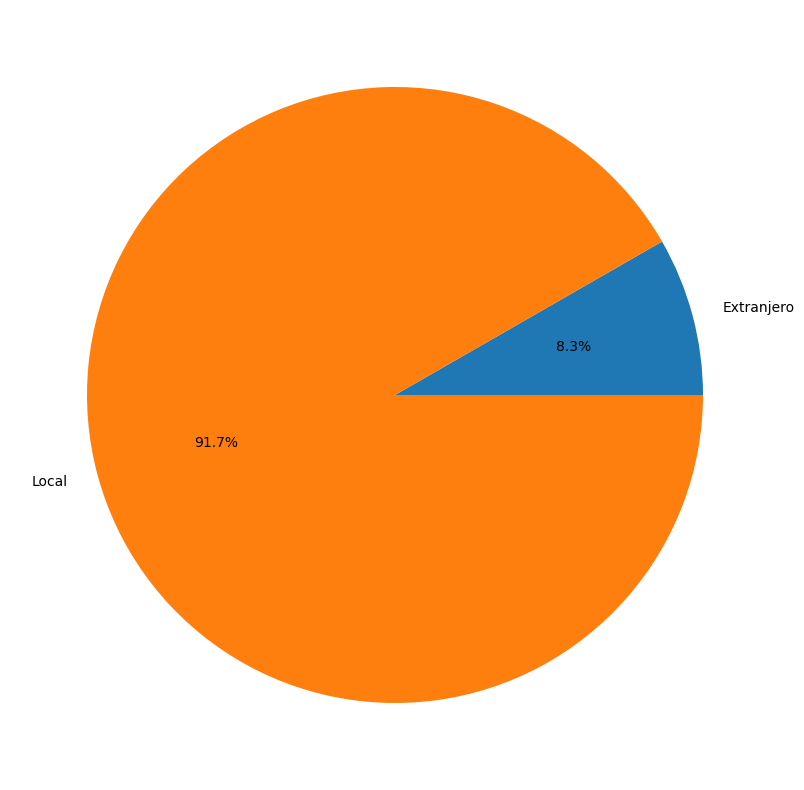

In [31]:
# Como el comportamiento puede ser muy diferente entre los clientes locales de los extranjeros, voy a agruparlos por locales y extranjeros
df["ORIGEN"] = np.where(df['WORK_COUNTRY'] == 'CN', 'Local', 'Extranjero')
df_local_extranjero = df_pais_origen.copy()
df_local_extranjero["WORK_COUNTRY"] = np.where(df_local_extranjero['WORK_COUNTRY'] == 'CN', 'Local', 'Extranjero')
df_local_extranjero = df_local_extranjero.groupby('WORK_COUNTRY').sum().reset_index()

plt.figure(figsize=(10,10))
patches, texts, pcts = plt.pie(
    x = df_local_extranjero[0],
    labels=df_local_extranjero["WORK_COUNTRY"],
    autopct='%1.1f%%')

plt.show()

##¿Cuáles son los 10 países de los que provienen la mayor cantidad de clientes extranjeros?

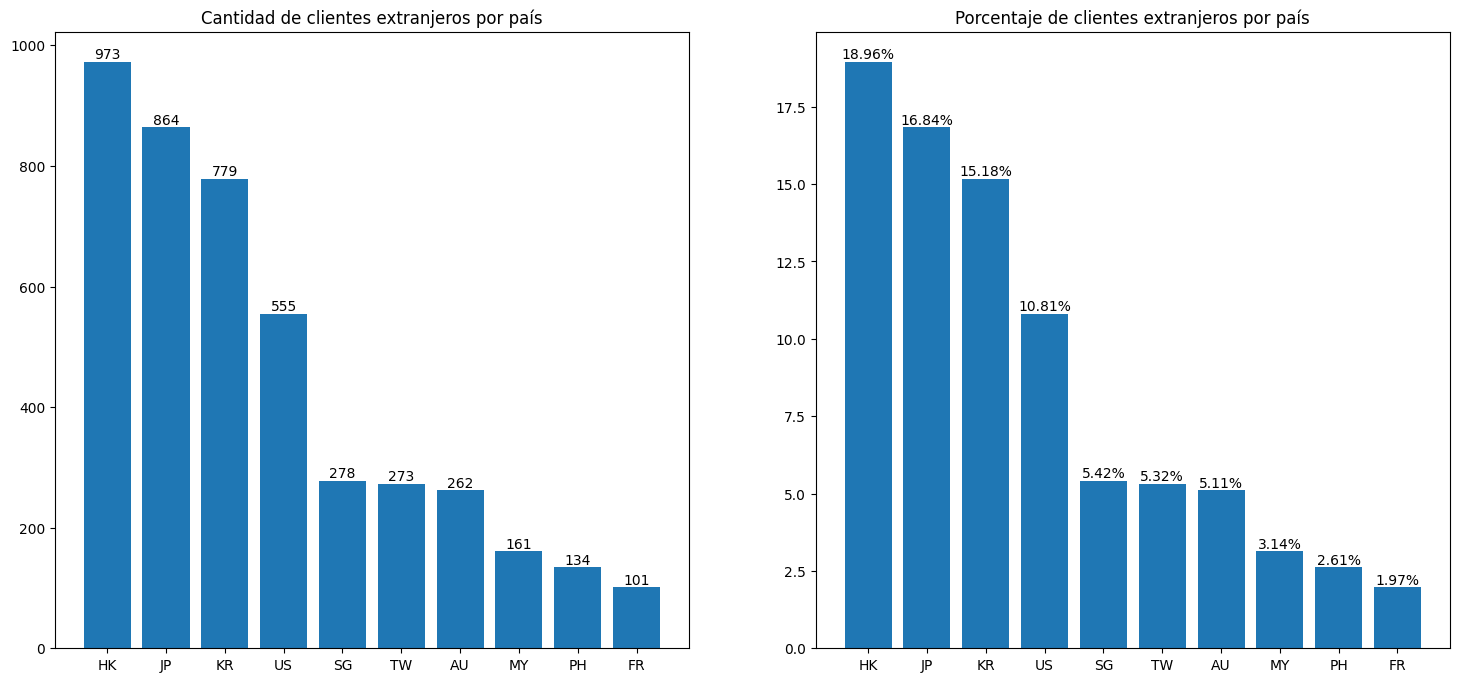

In [32]:
# Genero un dataset con los clientes que no son de China, con la cantidad por país, ordenado por cantidad descendente
df_extranjero = df[df['WORK_COUNTRY'] != 'CN'].groupby('WORK_COUNTRY').size().sort_values(ascending = False).reset_index()
df_extranjero["%"] = (df_extranjero[0] / df_extranjero[0].sum()) * 100
df_extranjero.columns = ["WORK_COUNTRY", "Cantidad", "%"]

# Me quedo con los 10 primeros
df_extranjero_top10 = df_extranjero.head(10)

fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharey=False)

axs[0].bar(df_extranjero_top10["WORK_COUNTRY"], df_extranjero_top10["Cantidad"])
axs[0].set_title('Cantidad de clientes extranjeros por país')

for bar in axs[0].patches:
      valor = str(int(bar.get_height()))
      axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{valor}', ha = 'center', va = 'bottom')

axs[1].bar(df_extranjero_top10["WORK_COUNTRY"], df_extranjero_top10["%"])
axs[1].set_title('Porcentaje de clientes extranjeros por país')
axs[1].set

for bar in axs[1].patches:
      valor = (bar.get_height())
      valor_str = "{:.2f}%".format(valor)
      axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{valor_str}', ha = 'center', va = 'bottom')

plt.show()

##¿Cuál es el top 10 de las provincias locales de donde provienen los clientes?

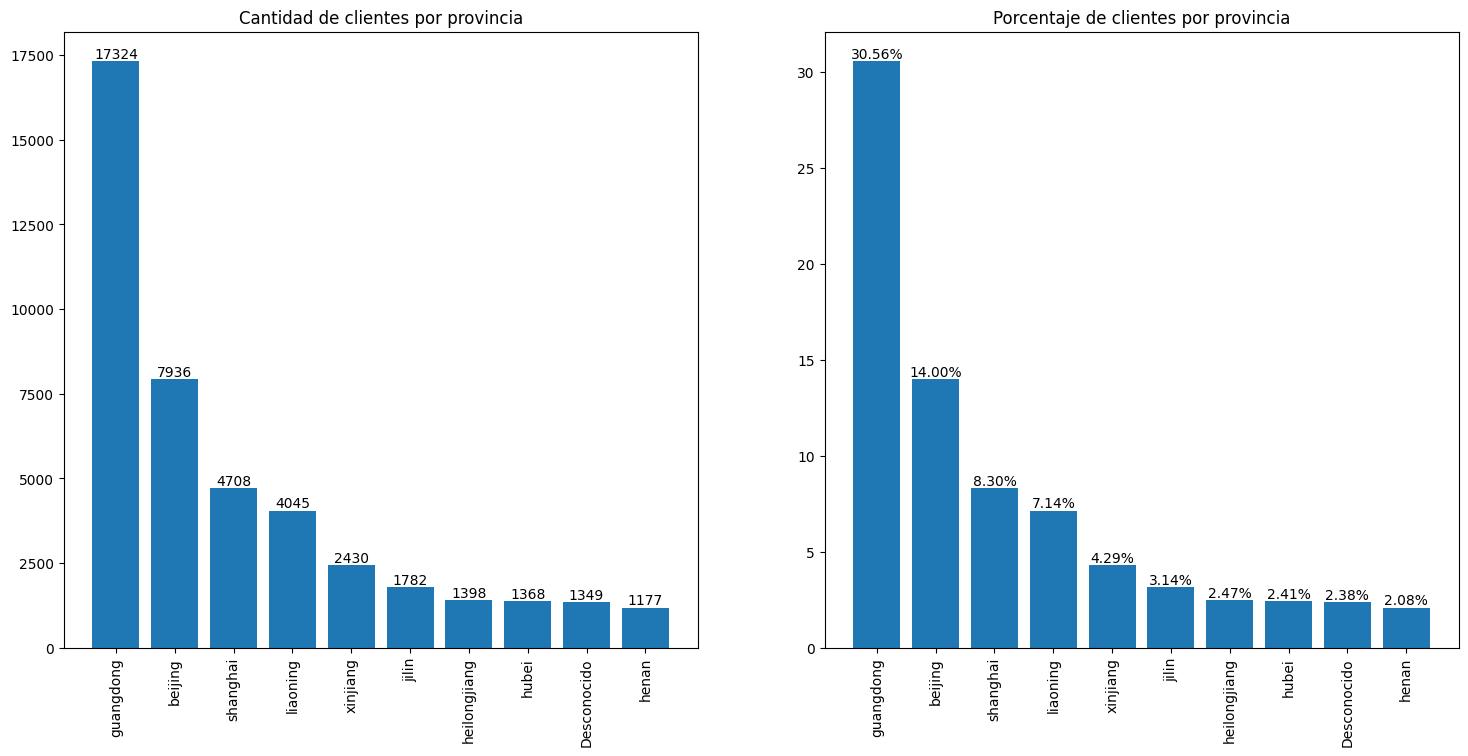

In [33]:
df_local = df[df['WORK_COUNTRY'] == 'CN'].groupby('WORK_PROVINCE').size().sort_values(ascending = False).reset_index()
df_local["%"] = (df_local[0] / df_local[0].sum()) * 100
df_local.columns = ["WORK_PROVINCE", "Cantidad", "%"]
df_local_top10 = df_local.head(10)

fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharey=False)

axs[0].bar(df_local_top10["WORK_PROVINCE"], df_local_top10["Cantidad"])
axs[0].set_title('Cantidad de clientes por provincia')
plt.sca(axs[0])
plt.xticks(rotation=90)

for bar in axs[0].patches:
      valor = str(int(bar.get_height()))
      axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{valor}', ha = 'center', va = 'bottom')

axs[1].bar(df_local_top10["WORK_PROVINCE"], df_local_top10["%"])
axs[1].set_title('Porcentaje de clientes por provincia')
plt.sca(axs[1])
plt.xticks(rotation=90)


for bar in axs[1].patches:
      valor = (bar.get_height())
      valor_str = "{:.2f}%".format(valor)
      axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{valor_str}', ha = 'center', va = 'bottom')

plt.show()


##¿Cuál es la proporción y cantidad de clientes por nivel de membresía?

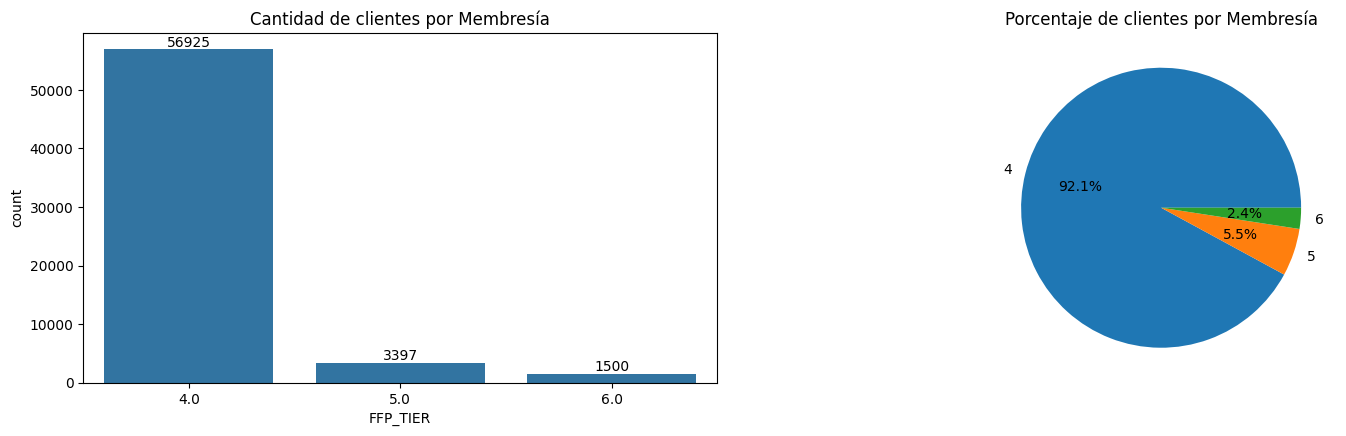

In [34]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
ax = sns.countplot(data=df_cat, x='FFP_TIER')
plt.bar_label(ax.containers[0])
plt.title('Cantidad de clientes por Membresía')

plt.subplot(2,2,2)
subset = pd.DataFrame(df.groupby('FFP_TIER').size())
plt.pie(subset[0], labels=subset.index, autopct='%1.1f%%')
plt.title('Porcentaje de clientes por Membresía')

plt.show()

El programa de viajeros más elegido es el "4", con una diferencia abrumadora sobre los otros dos

##¿Cuál es la proporción y cantidad de clientes por Género?

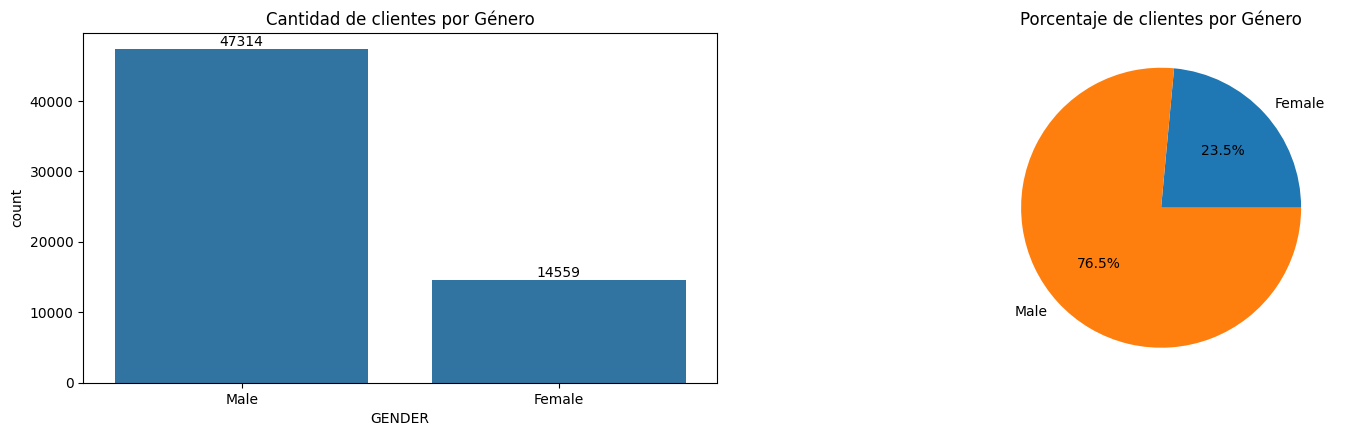

In [35]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
ax = sns.countplot(data=df_cat, x='GENDER')
plt.bar_label(ax.containers[0])
plt.title('Cantidad de clientes por Género')

plt.subplot(2,2,2)
subset = pd.DataFrame(df.groupby('GENDER').size())
plt.pie(subset[0], labels=subset.index, autopct='%1.1f%%')
plt.title('Porcentaje de clientes por Género')

plt.show()

Hay un porcentaje mucho mayor de clientes hombre que el de mujeres

##¿Cómo se distribuyen los clientes según su edad?
Podríamos clasificar las edades de los clientes simplemente por rangos de edad arbitrarios, como por ejemplo por década, pero podríamos entender mejor el comportamiento si los agrupamos por el periodo en el que nacieron, utilizando la definición de las diferentes generaciones. Se definen de esta forma según el año de nacimiento:
- Generación Grandiosa: 1901 - 1927
- Generación Silenciosa: 1928 - 1945
- Baby Boomers: 1946 - 1964
- Generación X: 1965 - 1980
- Millennials: 1981 - 1996
- Zoomers: 1997 - 2012

Considerando que este trabajo se realizó en el 2014, la edad a esa fecha era
- Generación Grandiosa: 87 - 113 años
- Generación Silenciosa: 69 - 86 años
- Baby Boomers: 50 - 68 años
- Generación X: 34 - 49 años
- Millennials: 18 - 33 años
- Zoomers: 2 - 17 años. Este grupo queda descartado porque quitamos a los menores de edad


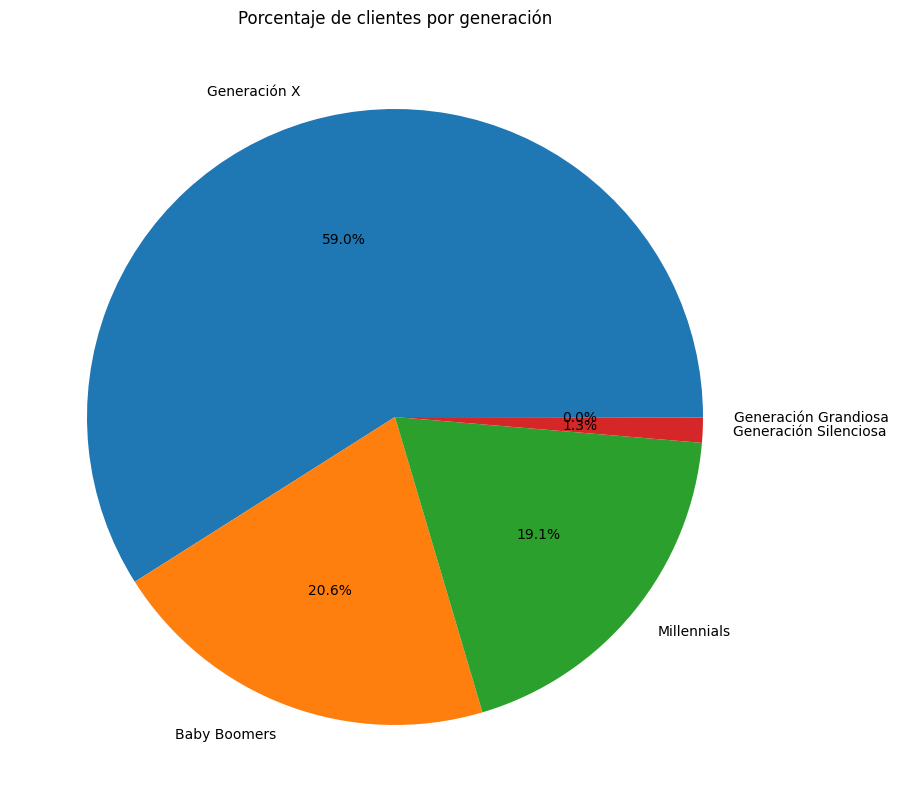

In [36]:
# Creo una función para asignar la generación según la edad
def getGeneracion(edad):
  if edad >= 87:
    return "Generación Grandiosa"
  elif edad >= 69:
    return "Generación Silenciosa"
  elif edad >= 50:
    return "Baby Boomers"
  elif edad >= 34:
    return "Generación X"
  else :
    return "Millennials"

# Le aplico la función al Data Frame principal
df['GENERACION'] = df['AGE'].apply(getGeneracion)

# Armo el dataframe
df_generacion_agrup = df.groupby('GENERACION').size().sort_values(ascending = False).reset_index()
df_generacion_agrup.columns = ["GENERACION", "Cantidad"]

# Ploteo
plt.figure(figsize=(18,10))
plt.pie(df_generacion_agrup["Cantidad"], labels=df_generacion_agrup["GENERACION"], autopct='%1.1f%%')
plt.title('Porcentaje de clientes por generación')
plt.show()

##¿Qué generación viaja con mayor frecuencia?

In [37]:
from dateutil import relativedelta

# Calculo el número de vuelos por año creando nuevas Features, como MesesVolando para poder calcular VuelosXAño
df['MesesVolando'] = df.apply(lambda row: ((relativedelta.relativedelta(row['LOAD_TIME'], row['FFP_DATE']).months) + (relativedelta.relativedelta(row['LOAD_TIME'], row['FFP_DATE']).years) * 12), axis=1)
df['VuelosXAño'] = df.apply(lambda row: (row['FLIGHT_COUNT'] / row['MesesVolando']) * 12 if row['MesesVolando'] != 0 else 0, axis=1)


# Calculo el promedio de km de los viajes
df['KMxVuelo'] = df.apply(lambda row: row['SEG_KM_SUM'] / row['FLIGHT_COUNT'], axis=1)

# Creo un nuevo dataframe para obtener la media de estos valores calculados
df_gen_media = pd.DataFrame(df.groupby('GENERACION')[['VuelosXAño', 'KMxVuelo']].mean())
df_gen_media
# Defino el orden a mostrar
order = ['Generación Grandiosa','Generación Silenciosa','Baby Boomers','Generación X','Millennials']
df_gen_media = df_gen_media.reindex(index=order)

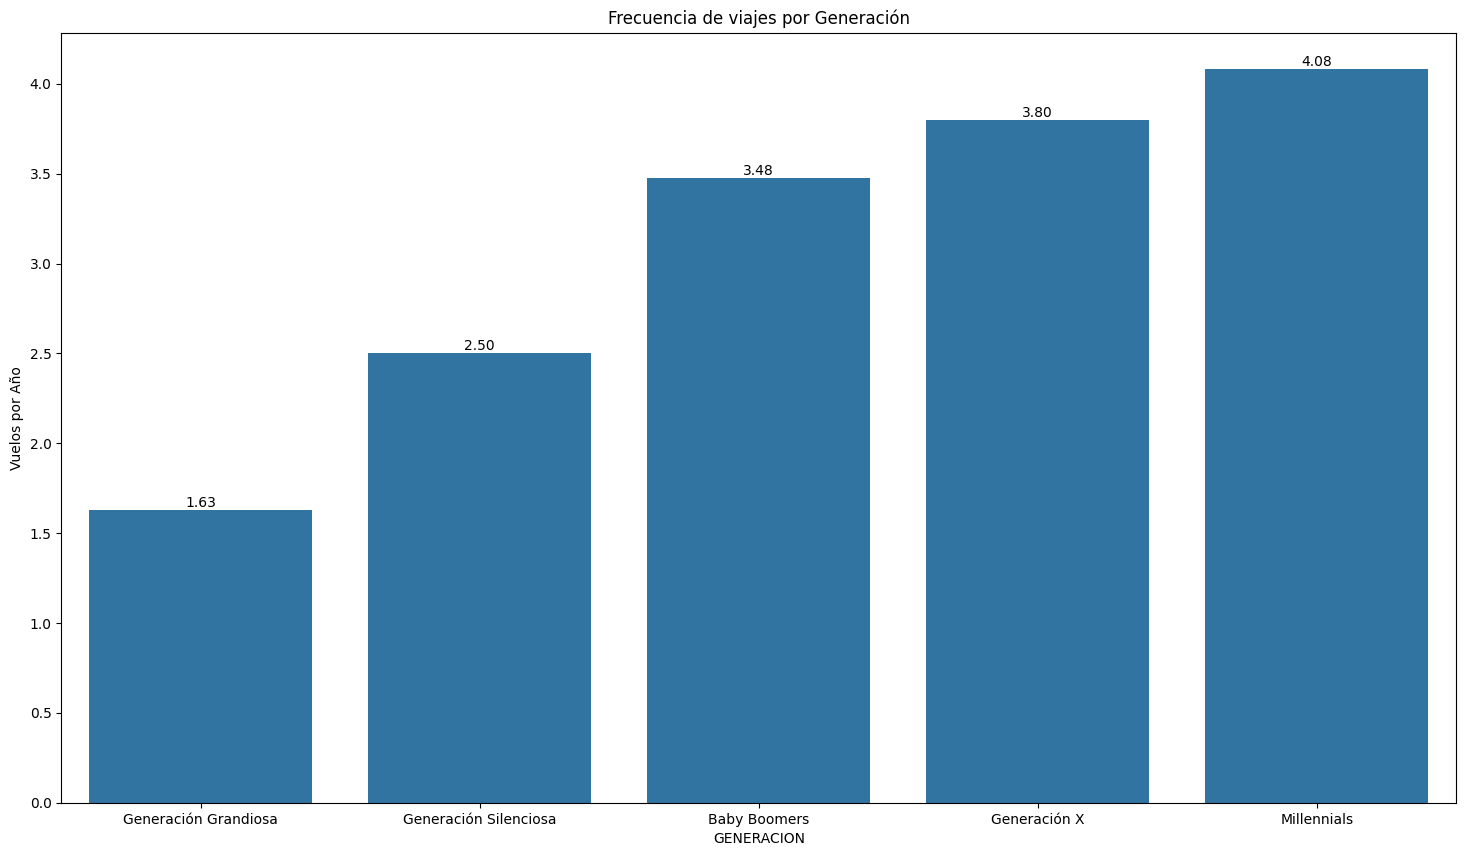

In [38]:
# Grafico la frecuencia por GENERACIÓN
plt.figure(figsize=(18,10))
ax = sns.barplot(y =df_gen_media['VuelosXAño'], x='GENERACION', data=df_gen_media)

for bar in ax.patches:
        valor = (bar.get_height())
        valor_str = "{:.2f}".format(valor)
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{valor_str}', ha = 'center', va = 'bottom')

plt.title('Frecuencia de viajes por Generación')
plt.ylabel('Vuelos por Año')

plt.show()

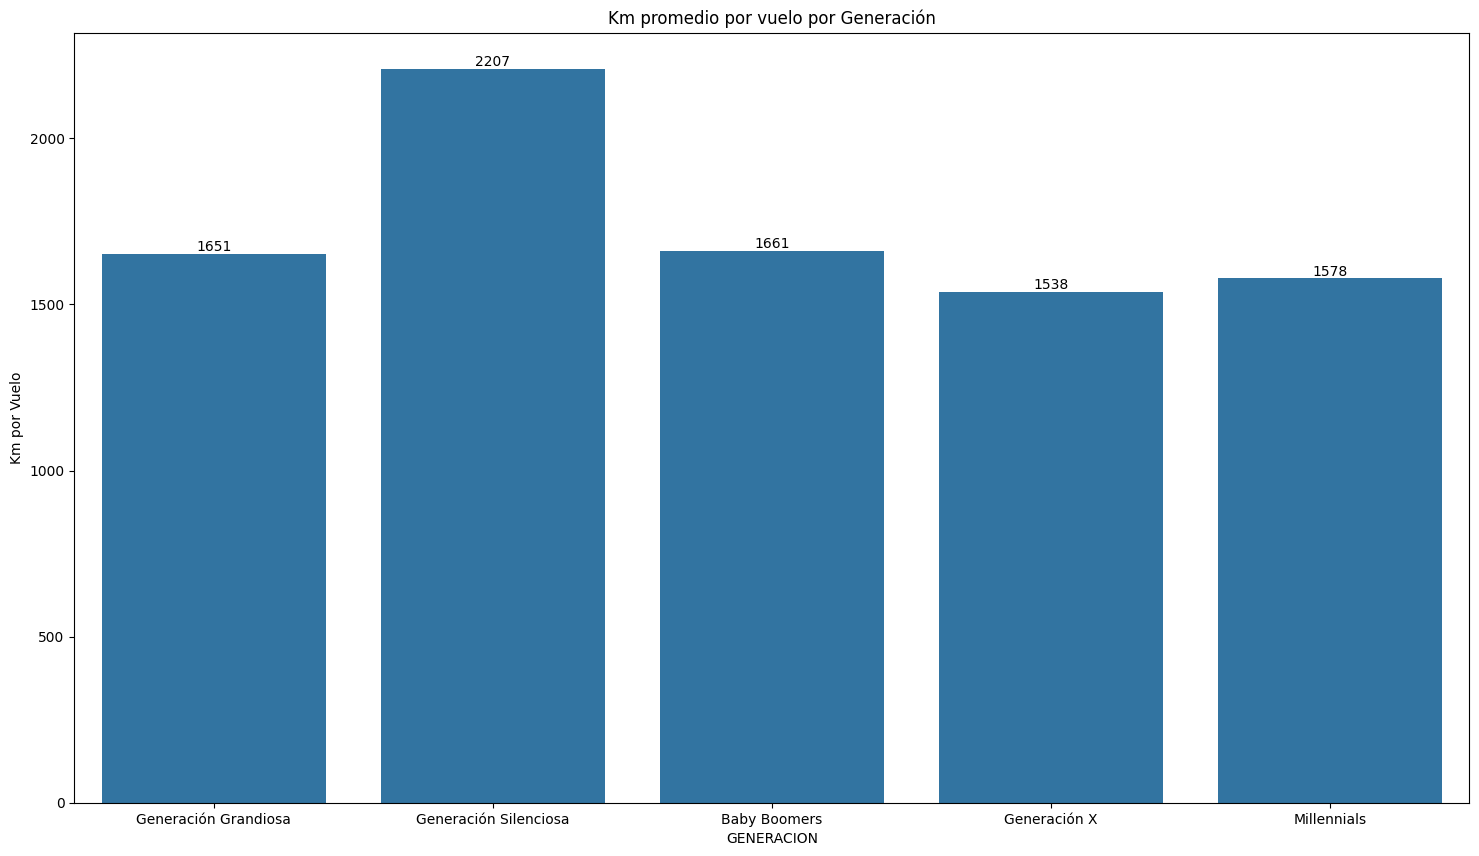

In [39]:
# Grafico el promedio de km por vuelo por GENERACIÓN
plt.figure(figsize=(18,10))
ax = sns.barplot(y =df_gen_media['KMxVuelo'], x='GENERACION', data=df_gen_media)

for bar in ax.patches:
        valor = str(int(bar.get_height()))
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{valor}', ha = 'center', va = 'bottom')

plt.title('Km promedio por vuelo por Generación')
plt.ylabel('Km por Vuelo')

plt.show()

## Frecuncia de vuelos según origen local o internacional


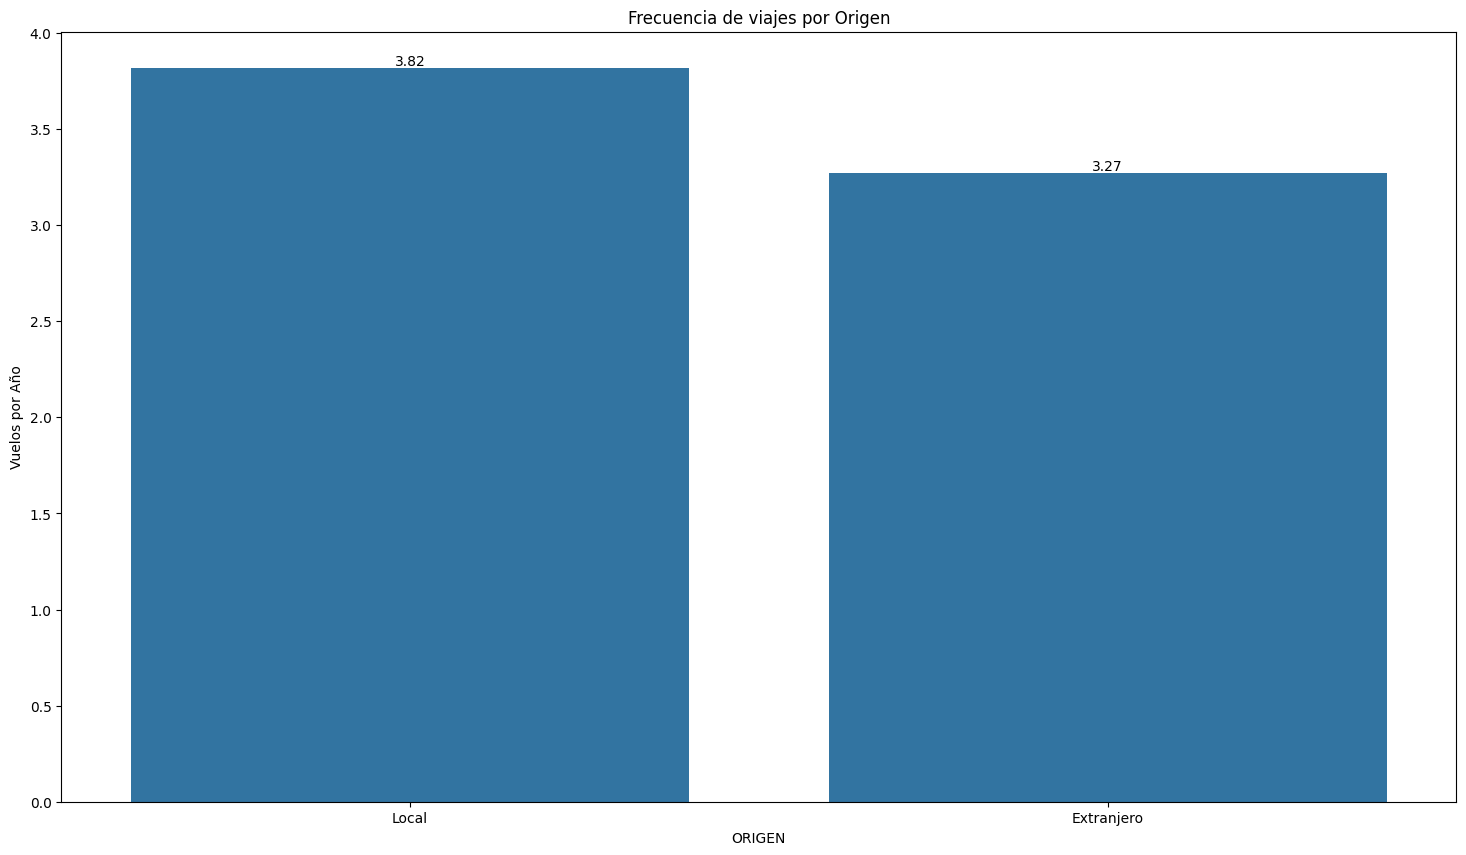

In [40]:
# Creo un nuevo dataframe para obtener la media de estos valores calculados
df_local_media = pd.DataFrame(df.groupby('ORIGEN')[['VuelosXAño', 'KMxVuelo']].mean())
df_local_media
# Defino el orden a mostrar
order = ['Local','Extranjero']
df_local_media = df_local_media.reindex(index=order)

# Grafico la frecuencia
plt.figure(figsize=(18,10))
ax = sns.barplot(y =df_local_media['VuelosXAño'], x='ORIGEN', data=df_local_media)

for bar in ax.patches:
        valor = (bar.get_height())
        valor_str = "{:.2f}".format(valor)
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{valor_str}', ha = 'center', va = 'bottom')

plt.title('Frecuencia de viajes por Origen')
plt.ylabel('Vuelos por Año')

plt.show()

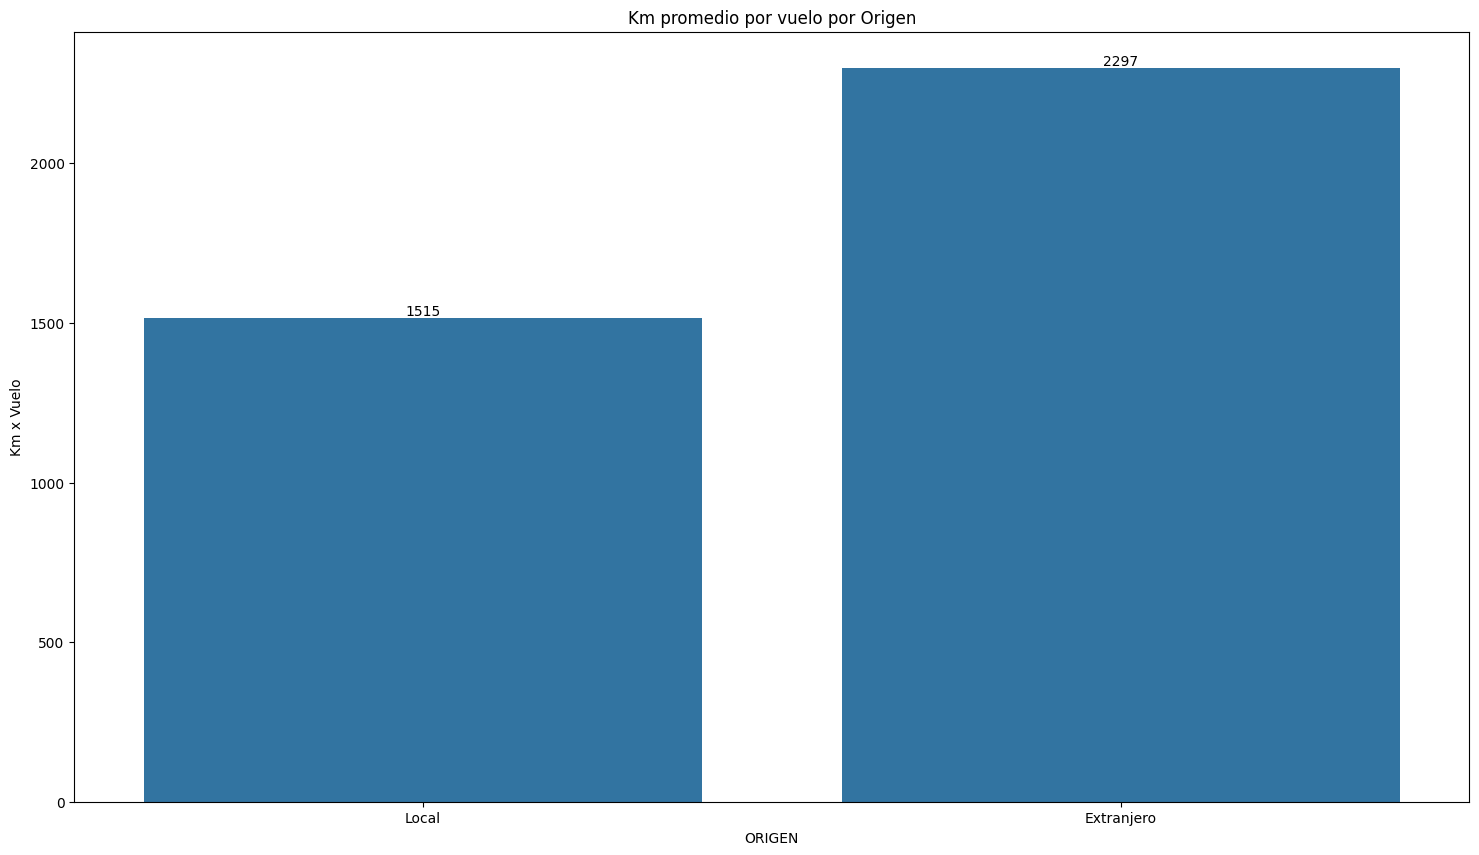

In [41]:
# Grafico el promedio de km por vuelo por Origen
plt.figure(figsize=(18,10))
ax = sns.barplot(y =df_local_media['KMxVuelo'], x='ORIGEN', data=df_local_media)

for bar in ax.patches:
        valor = str(int(bar.get_height()))
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{valor}', ha = 'center', va = 'bottom')

plt.title('Km promedio por vuelo por Origen')
plt.ylabel('Km x Vuelo')

plt.show()

##Frecuencia de vuelos según el Nivel de Membresía

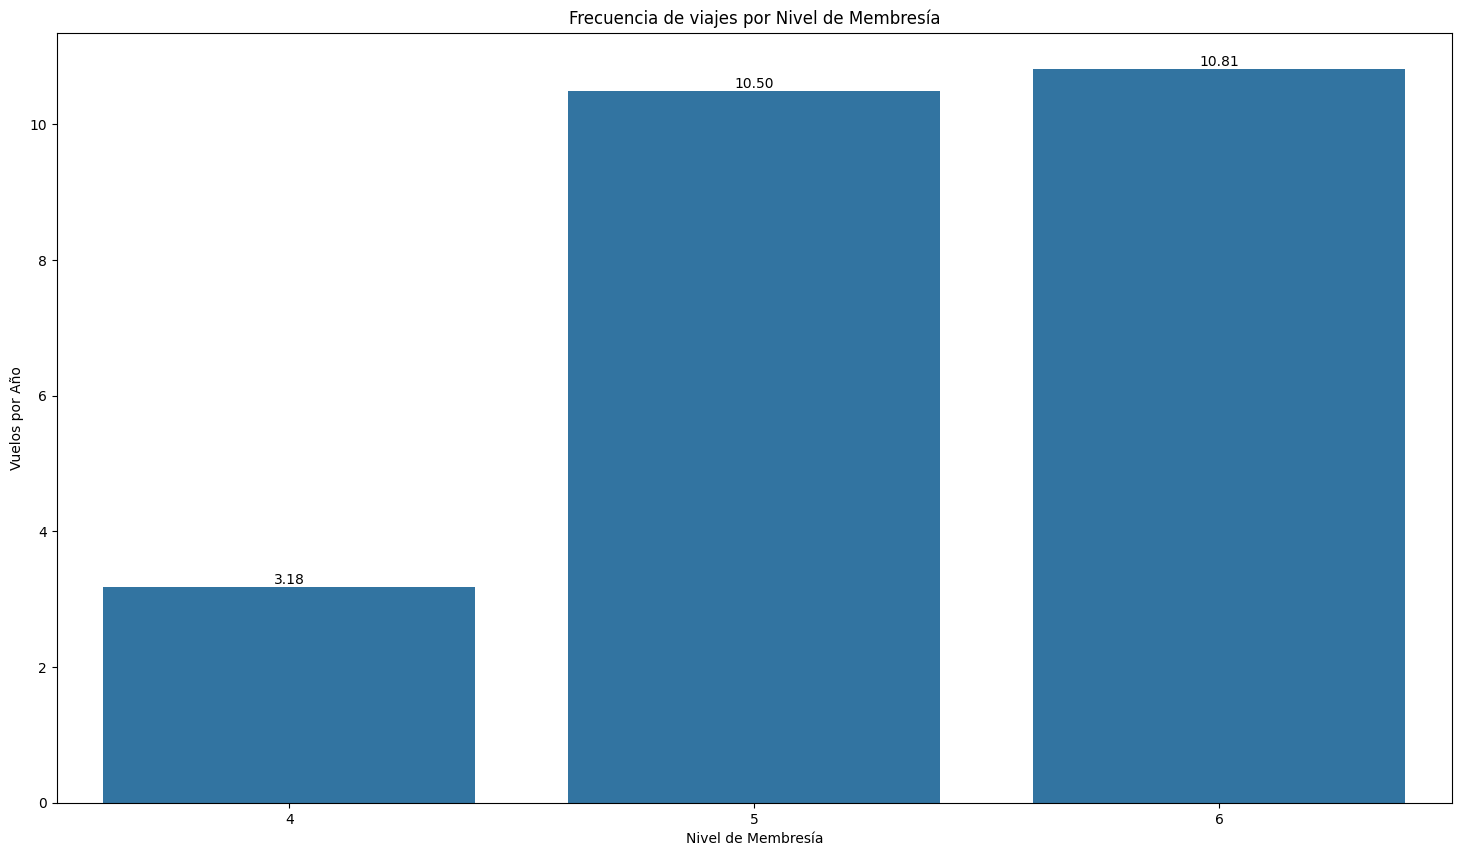

In [42]:
# Creo un nuevo dataframe para obtener la media de estos valores calculados
df_tier_media = pd.DataFrame(df.groupby('FFP_TIER')[['VuelosXAño', 'KMxVuelo']].mean())
df_tier_media
# Defino el orden a mostrar
order = [4,5,6]
df_tier_media = df_tier_media.reindex(index=order)

# Grafico la frecuencia
plt.figure(figsize=(18,10))
ax = sns.barplot(y =df_tier_media['VuelosXAño'], x='FFP_TIER', data=df_tier_media)

for bar in ax.patches:
        valor = (bar.get_height())
        valor_str = "{:.2f}".format(valor)
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{valor_str}', ha = 'center', va = 'bottom')

plt.title('Frecuencia de viajes por Nivel de Membresía')
plt.xlabel('Nivel de Membresía')
plt.ylabel('Vuelos por Año')
plt.show()

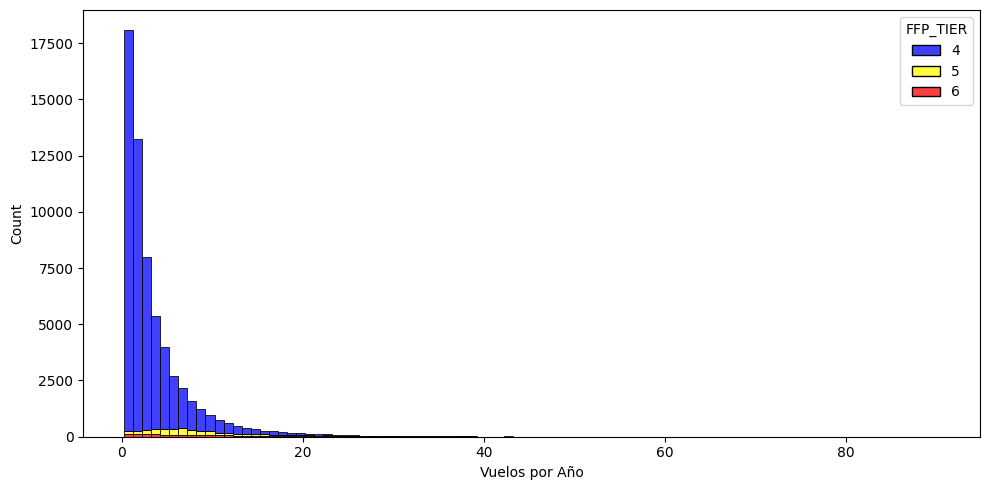

In [43]:
# voy a cruzar nivel de membresía con frecuencia de viajes
plt.figure(figsize = (10,5))
colores = ["blue", "yellow", "red"]
sns.histplot(data=df, x='VuelosXAño', hue='FFP_TIER', palette = colores, binwidth=1, multiple="stack")
plt.xlabel('Vuelos por Año')
plt.tight_layout()
plt.show()


No voy a consider los valores de mayor cantidad de vuelos por año, porque representan a muy pocos viajeros

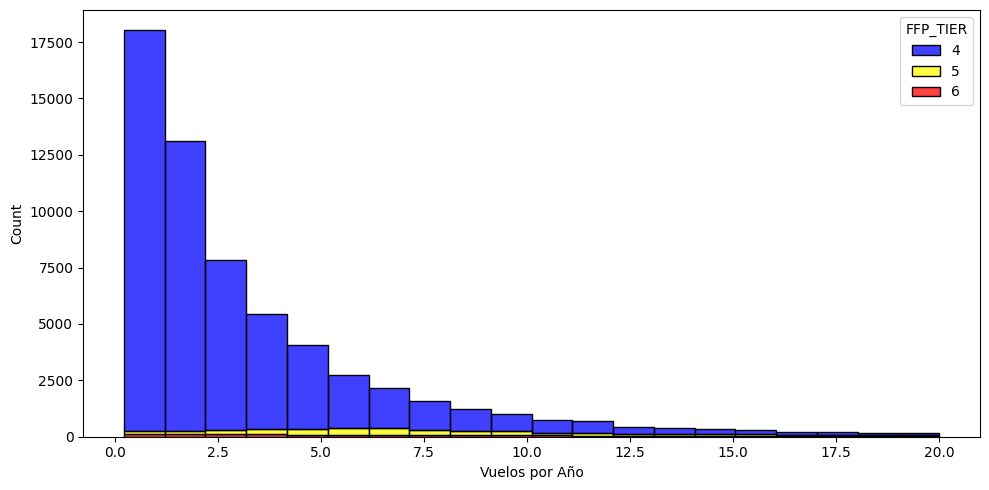

In [44]:
# Filtro y vuelvo a graficar
df_frec_tier = df[df['VuelosXAño']<=20]
plt.figure(figsize = (10,5))
sns.histplot(data=df_frec_tier, x='VuelosXAño', hue='FFP_TIER', palette = colores, binwidth=1, multiple="stack")
plt.xlabel('Vuelos por Año')
plt.tight_layout()
plt.show()

De este último gráfico se puede apreciar que hay varios clientes que tienen el nivel de membresía 6 y viajan con poca frecuencia, pero por el contrario, hay muchos clientes con la membresía 4, que viajan con mucha frecuencia.
Seguramente les resulte más conveniente aumentar su nivel de membresía, sugeriría contactarlos para ofrecerles aumentar su nivel, comenzando por los que tienen mayor frecuencia hasta tal vez los que tienen una frecuencia de 6 o 7 vuelos por año. También hay varios clientes con nivel de membresía 5 que tienen una alta frecuencia de viajes, también se les podría sugerir aumentar su membresía al nivel 6

In [45]:
# Calculo cuántos están en una situación para ofrecerles aumentar
cant_4_mas_6 = len(df[(df['FFP_TIER'] == 4) & (df['VuelosXAño'] >= 6)])
cant_4_mas_7 = len(df[(df['FFP_TIER'] == 4) & (df['VuelosXAño'] >= 7)])
cant_5_mas_10 = len(df[(df['FFP_TIER'] == 5) & (df['VuelosXAño'] >= 10)])

print(str(cant_4_mas_6), "clientes con nivel 4 y más de 6 vuelos por año")
print(str(cant_4_mas_7), "clientes con nivel 4 y más de 7 vuelos por año")
print(str(cant_5_mas_10), "clientes con nivel 5 y más de 10 vuelos por año")

8208 clientes con nivel 4 y más de 6 vuelos por año
6064 clientes con nivel 4 y más de 7 vuelos por año
1261 clientes con nivel 5 y más de 10 vuelos por año


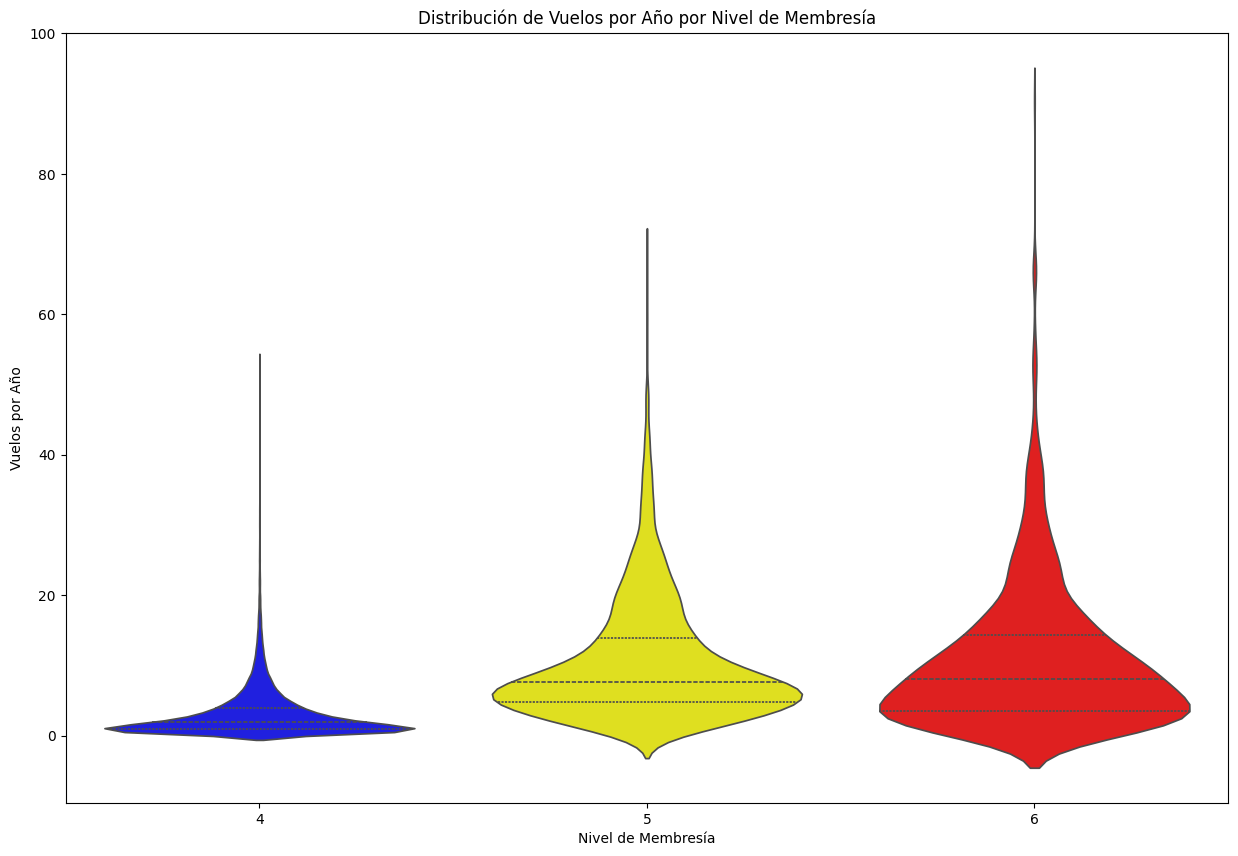

In [46]:
# Otra forma de ver la distribución es mediante un gráfico de violín
plt.figure(figsize = (15,10))
ax = sns.violinplot(data=df, x='FFP_TIER', y='VuelosXAño', palette = colores, inner="quartile")

plt.title("Distribución de Vuelos por Año por Nivel de Membresía")
plt.xlabel("Nivel de Membresía")
plt.ylabel("Vuelos por Año")

plt.show()

#5) Análisis LRFMC
Se realiza el análisis a partir de generar indicadores que están relacionados con:
- L (Loyalty --> Lealtad), lo asociamos a la duración de la membresía, asociado al campo calculado MesesVolando
- R (Recency --> Actualidad), mide cuán reciente fue la última vez que el cliente voló con la aerolínea, asociado al campo LAST_TO_END
- F (Frequency --> Frecuencia), mide la frecuencia con la que realiza vuelos con la aerolínea, asociado al campo FLIGHT_COUNT
- M (Monetary --> Factor Monetario), mide el nivel de ingresos que recibió la aerolínea por cada cliente, como una simplificación en el negocio aéreo, esta característica se suele reemplazar por horas de vuelo acumuladas dentro de un período de tiempo determinado, asociado al campo SEG_KM_SUM
- C (Customer Cost --> Costo para el Cliente), mide cómo afecta el costo para el cliente, por ejemplo considerando el descuento promedio que ha recibido, asociado al campo avg_discount

In [47]:
df_LRFMC = df[['MesesVolando', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
df_LRFMC.head()

,MesesVolando,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,88,1,210,580717,0.961639
1,85,7,140,293678,1.252314
2,85,11,135,283712,1.254676
3,67,97,23,281336,1.090870
4,59,5,152,309928,0.970658


In [48]:
# Veo los valores resumidos
df_LRFMC.describe().apply(lambda x:x.apply('{:.5f}'.format))

,MesesVolando,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
count,61822.00000,61822.00000,61822.00000,61822.00000,61822.00000
mean,48.29559,172.55935,11.96781,17301.23695,0.72170
std,27.82600,181.20876,14.11741,21040.84023,0.18479
min,12.00000,1.00000,2.00000,368.00000,0.00000
25%,24.00000,29.00000,3.00000,4866.00000,0.61268
50%,41.00000,105.00000,7.00000,10182.00000,0.71185
75%,71.00000,260.00000,15.00000,21492.25000,0.80889
max,112.00000,731.00000,213.00000,580717.00000,1.50000


In [49]:
# Renombro las columnas para simplificar el análisis
df_LRFMC.columns = ['Loyalty', 'Recency', 'Frequence', 'Monetary', 'CustomerCost']
df_LRFMC.head()

,Loyalty,Recency,Frequence,Monetary,CustomerCost
0,88,1,210,580717,0.961639
1,85,7,140,293678,1.252314
2,85,11,135,283712,1.254676
3,67,97,23,281336,1.090870
4,59,5,152,309928,0.970658


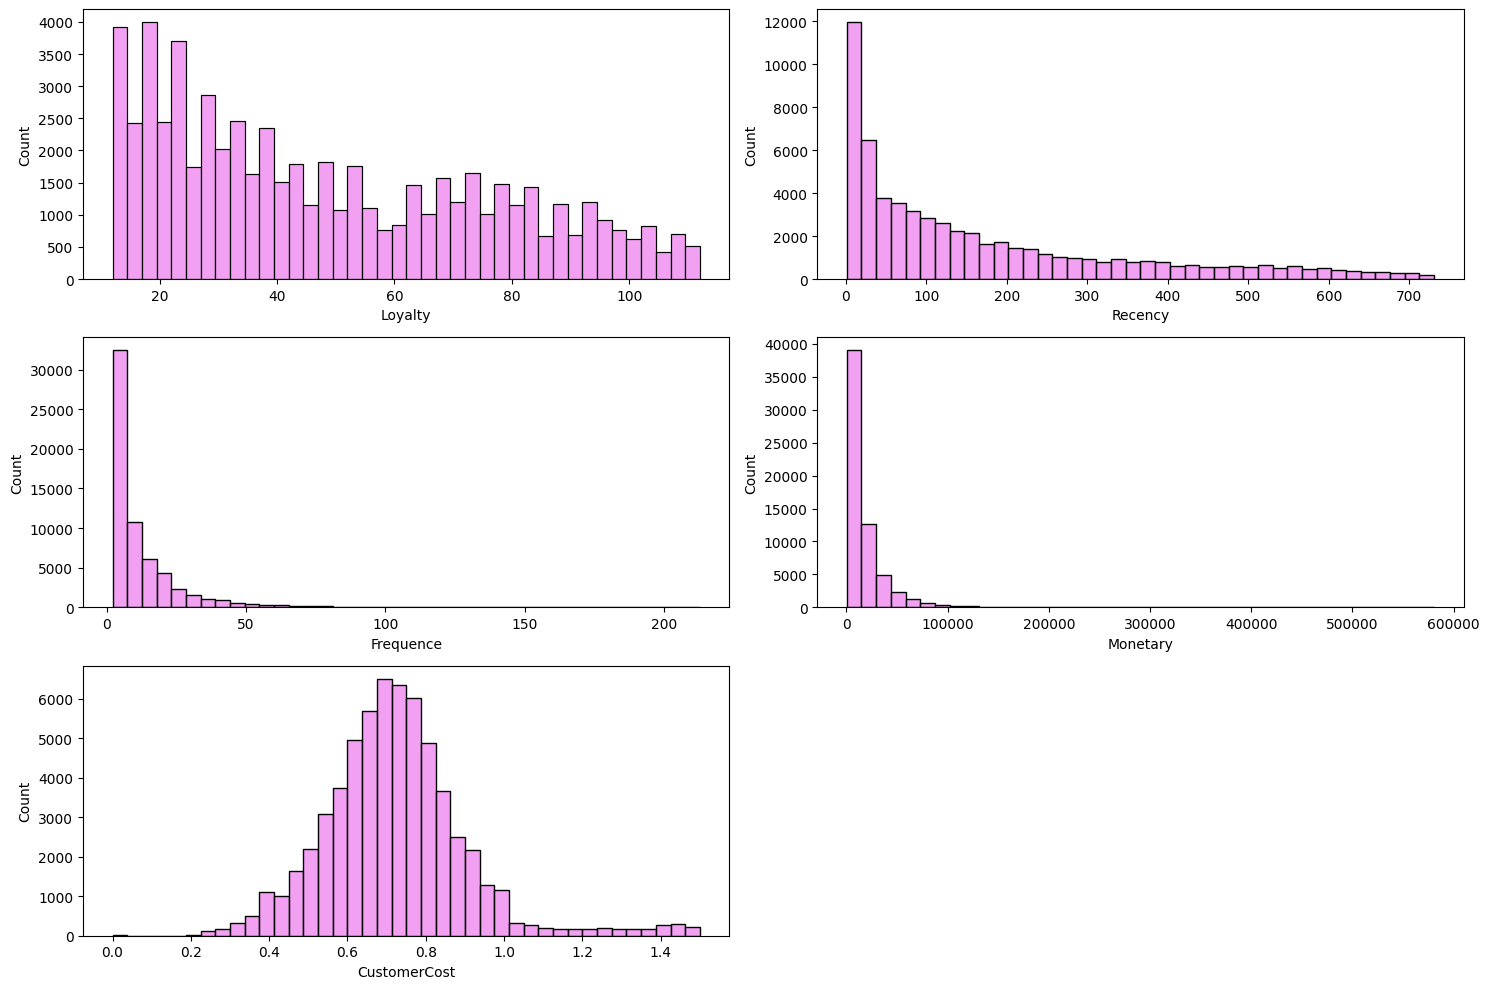

In [50]:
# Analizo la distribución utilizando histogramas

plt.figure(figsize = (15,10))
for i in range(len(df_LRFMC.columns)):
  plt.subplot(3,2,i+1)
  sns.histplot(data=df_LRFMC, x=df_LRFMC.columns[i], bins = 40, color = 'violet')
  plt.xlabel(df_LRFMC.columns[i])
  plt.tight_layout()

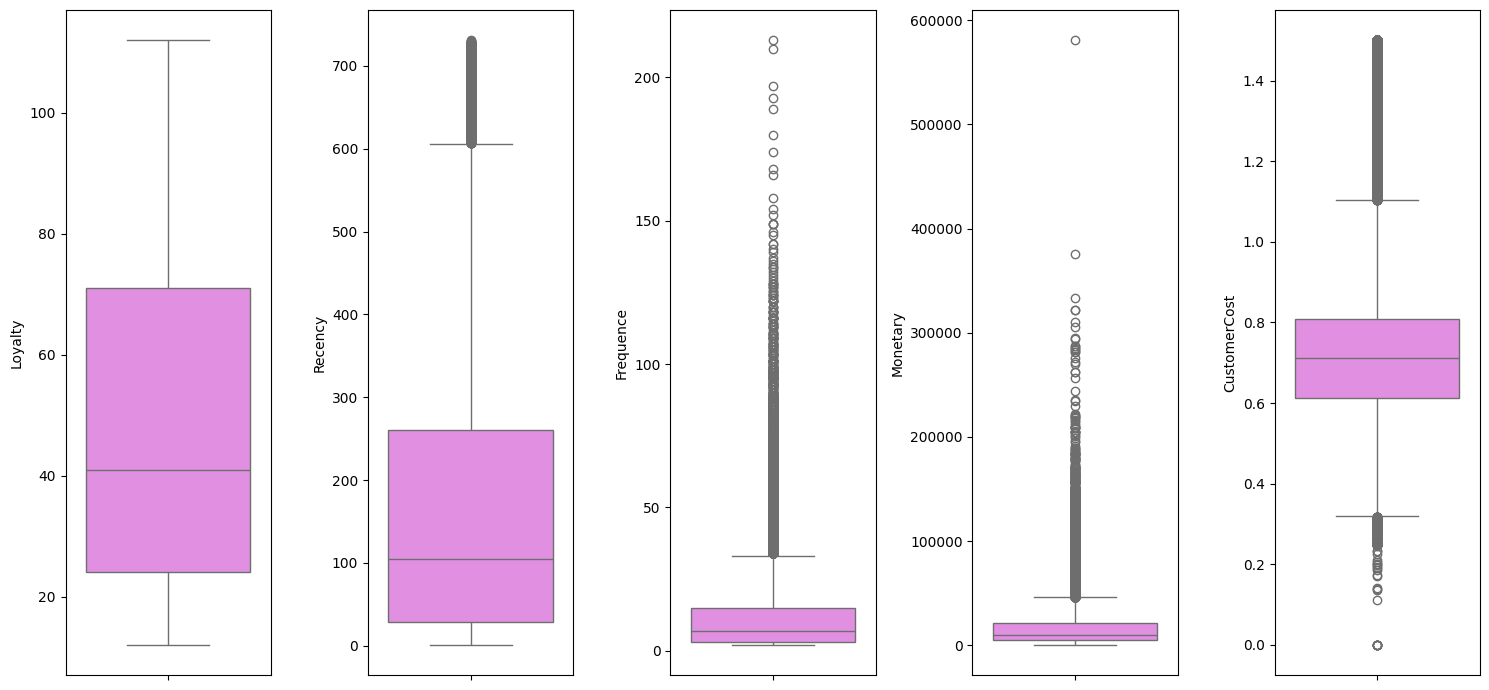

In [51]:
# Detección de Outliers, de manera gráfica y calculándolo

plt.figure(figsize = (15,7))
for i in range(len(df_LRFMC.columns)):
  plt.subplot(1,5,i+1)
  sns.boxplot(data=df_LRFMC, y=df_LRFMC.columns[i], color = 'violet')
  plt.tight_layout()

De manera gráfica se identifica que Loyalty no tiene Outliear, pero el resto de los campos sí

In [52]:
# Calculo los outliers

def getOutliers(dfo, col):
  Q1 = dfo[col].quantile(0.25)
  Q3 = dfo[col].quantile(0.75)
  IQR = Q3 - Q1
  outliers = dfo[(dfo[col] < Q1 - 1.5 * IQR) | (dfo[col] > Q3 + 1.5 * IQR)]
  return outliers

for col in df_LRFMC.columns:
  outliers = getOutliers(df_LRFMC, col)
  porcentaje = round(len(outliers) / len(df_LRFMC) * 100,2)
  print(f"Outliers en {col}: {len(outliers)} ({porcentaje}%)")


Outliers en Loyalty: 0 (0.0%)
Outliers en Recency: 2156 (3.49%)
Outliers en Frequence: 4288 (6.94%)
Outliers en Monetary: 4695 (7.59%)
Outliers en CustomerCost: 2551 (4.13%)


In [53]:
# Sustituyo valores Outliers por los valores del primer y último decil

df_sin_outliers = df_LRFMC.copy()

# Defino solo las columnas que le voy a aplicar el cambio
cols = ['Recency', 'Frequence', 'Monetary', 'CustomerCost']
for col in cols:
  Q1 = df_sin_outliers[col].quantile(0.1)
  Q9 = df_sin_outliers[col].quantile(0.9)
  df_sin_outliers[col] = df_sin_outliers[col].apply(lambda x: Q1 if x < Q1 else Q9 if x > Q9 else x)

df_sin_outliers.describe().apply(lambda x:x.apply('{:.5f}'.format))

,Loyalty,Recency,Frequence,Monetary,CustomerCost
count,61822.00000,61822.00000,61822.00000,61822.00000,61822.00000
mean,48.29559,162.20439,10.21353,14753.15976,0.71248
std,27.82600,156.54847,8.47206,12168.97686,0.12805
min,12.00000,8.00000,2.00000,2765.00000,0.51033
25%,24.00000,29.00000,3.00000,4866.00000,0.61268
50%,41.00000,105.00000,7.00000,10182.00000,0.71185
75%,71.00000,260.00000,15.00000,21492.25000,0.80889
max,112.00000,473.00000,28.00000,40025.90000,0.92000


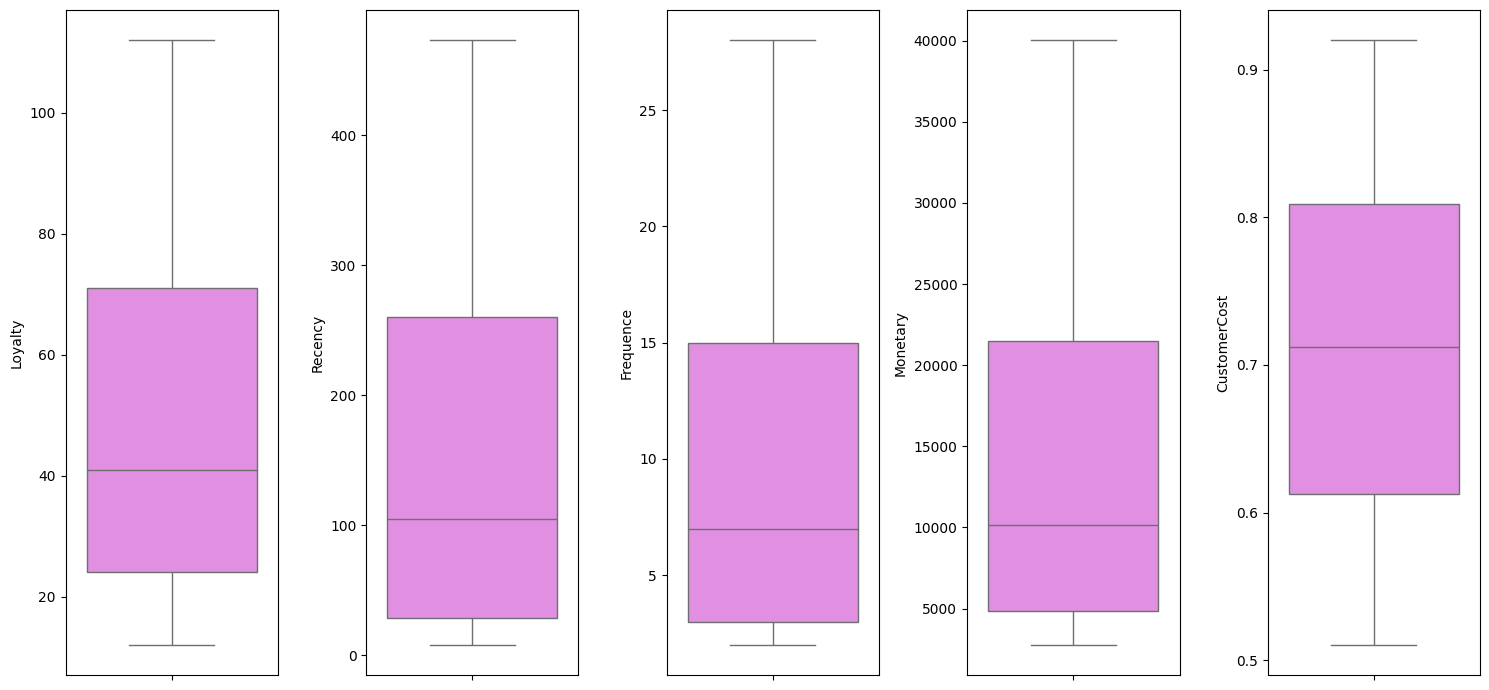

In [54]:
# Vuelvo a representar los gráficos Boxplot
plt.figure(figsize = (15,7))
for i in range(len(df_sin_outliers.columns)):
  plt.subplot(1,5,i+1)
  sns.boxplot(data=df_sin_outliers, y=df_sin_outliers.columns[i], color = 'violet')
  plt.tight_layout()

Con estas variables vamos a poder continuar realizando el análisis cuando veamos nuevas herramientas.

#6) Conclusiones
Hasta el momento podemos sacar las siguientes conclusiones:
- La enorme mayoría de los clientes son locales con el 91.7%.
- La provincia de la que provienen la mayor cantidad de clientes es Guandong con el 30.56%.
- De los clientes extranjeros, mayoritariamente son de Hong Kong (18.96%), Japón (16.84%) y Korea del Sur (15.18%).
- La mayoría de los clientes son hombres con el 76.5%.
- Por edad, la generación con mayor participación es la Generación X (entre 34 y 48 años, con el 59%. Sin embaro los que viajan con mayor frecuencia con los Millennials (entre 18 y 33 años), con un promedio de 4.08 viajes por año. Finalmente, la generación con el mayor promedio de km por viaje es la Generación Silenciosa (entre 69 y 86 años).
- No hay una diferencia significativa en la fecuencia de viaje entre los viajeros locales y los extranjeros.
- Bastante predecible que los km promedio realizados por los viajeros extranjeros (2297 km) es mayor a la de los locales (1515 km).
- Analizando por el tipo de membresía, la enorme mayoría pertenecen al nivel 4 (92.1%), sin embargo la frecuencia de viaje es la menor (3.18 viajes por año), mientras que los clientes pertenecientes a los niveles 5 y 6 promedian más de 10 viajes por año.
- Como mencionamos anteriormente, hay una cantidad importante de clientes que están en el nivel de membresía 4 pero tienen una frecuencia de viaje bastante alta, 8208 hacen más de 6 viajes por año y 6064 más de 7. También 1261 clientes pertenecen al nivel de membresía 5 y realizan más de 10 viajes por año. Estos son candidatos para ofrecerle subir de nivel en su membresía.
- Analizando los factores **LRFMC**, podemos concluir que la distribución en la lealtad es bastante uniforme, la mayoría de los clientes han ralizado vuelos recientemente, la mayoría tiene una frecuencia de viajes baja, así como también la mayoría aporta poca cantidad en lo monetario, mientras el promedio de descuento de los clientes muestra una distribución bastante normal